# Proyek Analisis Data: Air Quality Dataset Guanyuan
- **Nama:** Malikus Syafaadi Nurfaza
- **Email:** malikussyafaadinurfaza@gmail.com
- **ID Dicoding:** malikusfz

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan korelasi antara berbagai variabel polutan (seperti PM2.5, PM10, SO2, NO2, CO, O3), cuaca (TEMP, PRES, DEWP, RAIN), dan faktor lainnya (WSPM, wd)? 
- Bagaimana distribusi konsentrasi PM2.5 dan PM10 tahunan?
- Apakah ada variasi musiman dalam kualitas udara? Musim apa yang cenderung memiliki tingkat polusi tertinggi dan terendah?
- Bagaimana perbedaan dalam kualitas udara pada jam sibuk dibandingkan jam non-sibuk (pagi dan malam)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

## Data Wrangling

### Gathering Data

In [2]:
guanyuan_df = pd.read_csv('Data/PRSA_Data_Guanyuan_20130301-20170228.csv')
guanyuan_df.drop(columns=['No'], inplace=True)
display(guanyuan_df)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


**Insight:**
- Data menunjukkan konsentrasi polutan seperti PM2.5 dan PM10 pada berbagai bulan dan tahun dari 2013 hingga 2017, yang dapat dianalisis untuk melihat perubahan polusi dari waktu ke waktu. Kita bisa melihat bagaimana tingkat polusi berubah pada hari-hari tertentu dan jam tertentu untuk menemukan periode dengan konsentrasi polusi tertinggi.
-  Data juga mencakup informasi meteorologi seperti suhu (TEMP), tekanan (PRES), dan kecepatan angin (WSPM). Hal ini memungkinkan untuk melihat bagaimana faktor-faktor cuaca ini berkaitan dengan tingkat polusi. Sebagai contoh, kita dapat melihat apakah kecepatan angin tinggi membantu menurunkan konsentrasi polutan seperti PM2.5 dan PM10, serta menganalisis pengaruh suhu dan tekanan udara terhadap penyebaran polusi.

### Assessing Data

In [3]:
BOLD = '\033[1m'
END = '\033[0m'
print(f"\nDataframe: {BOLD}guanyuan_df{END}")
guanyuan_df.info()
guanyuan_df.describe(include='all')


Dataframe: guanyuan_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     35064 non-null  int64  
 1   month    35064 non-null  int64  
 2   day      35064 non-null  int64  
 3   hour     35064 non-null  int64  
 4   PM2.5    34448 non-null  float64
 5   PM10     34635 non-null  float64
 6   SO2      34590 non-null  float64
 7   NO2      34405 non-null  float64
 8   CO       33311 non-null  float64
 9   O3       33891 non-null  float64
 10  TEMP     35044 non-null  float64
 11  PRES     35044 non-null  float64
 12  DEWP     35044 non-null  float64
 13  RAIN     35044 non-null  float64
 14  wd       34983 non-null  object 
 15  WSPM     35050 non-null  float64
 16  station  35064 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 4.5+ MB


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,34983,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064
mean,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,NaN,1.204071,NaN
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [4]:
print(f"\nDataframe: {BOLD}guanyuan_df{END}")
print(guanyuan_df.isna().sum())


Dataframe: guanyuan_df
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [5]:
print(f"\nDataframe: {BOLD}guanyuan_df{END}")
print("Jumlah data yang duplikat:", guanyuan_df.duplicated().sum())


Dataframe: guanyuan_df
Jumlah data yang duplikat: 0


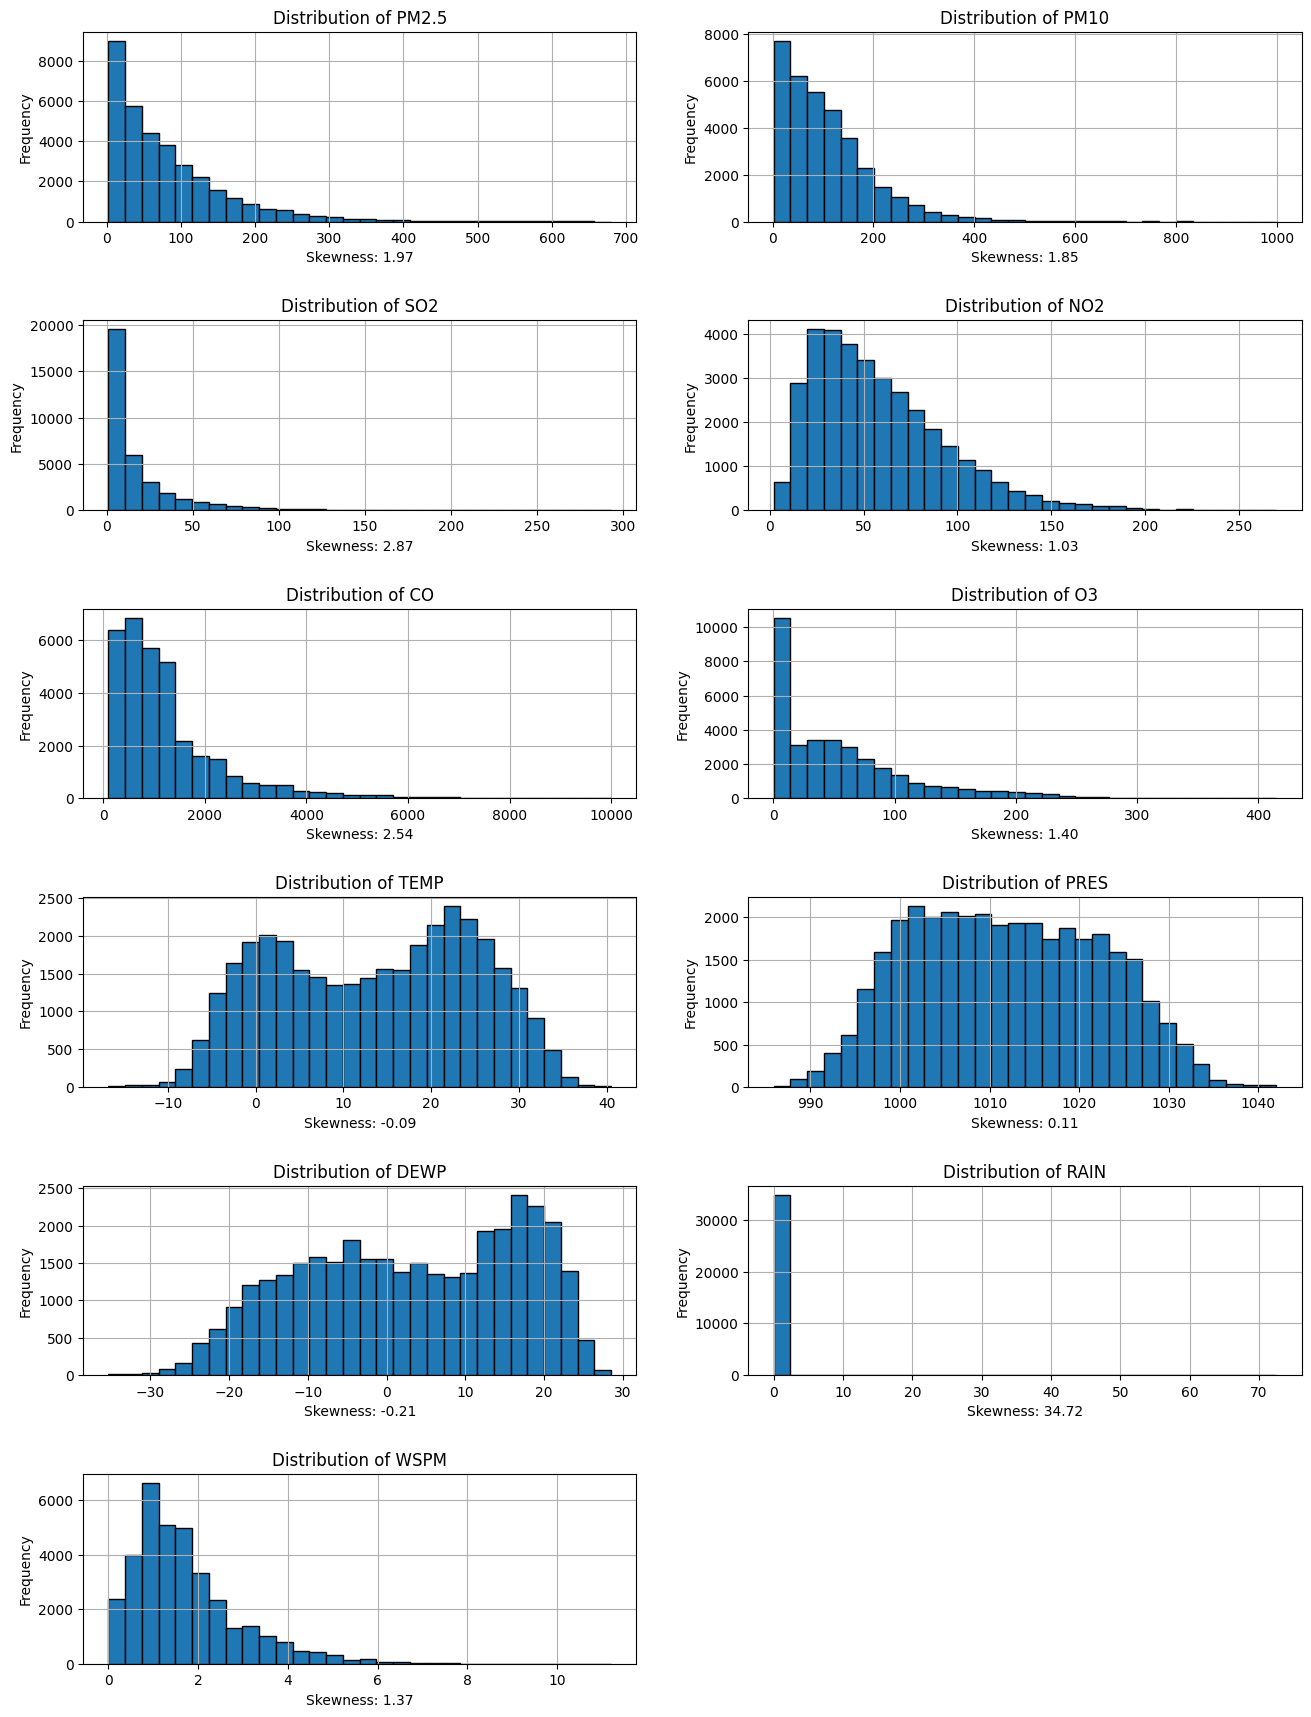

In [6]:
columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

fig, axes = plt.subplots(6, 2, figsize=(14, 18))
fig.tight_layout(pad=5.0)

axes = axes.flatten()

for i, column in enumerate(columns):
    x = np.arange(len(guanyuan_df[column]))
    guanyuan_df[column].hist(bins=30, edgecolor="black", ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(f'Skewness: {guanyuan_df[column].skew():.2f}')
    axes[i].set_ylabel('Frequency')

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()

**Insight:**
- Data memiliki beberapa missing value tetapi tidak ada duplikat.
- Pesebaran data ada yang normal ada yang miring.

### Cleaning Data

In [7]:
guanyuan_df['datetime'] = pd.to_datetime(guanyuan_df[['year', 'month', 'day', 'hour']])
guanyuan_df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)
guanyuan_df.set_index('datetime', inplace=True)
guanyuan_df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
2013-03-01 01:00:00,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2013-03-01 02:00:00,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
2013-03-01 03:00:00,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
2013-03-01 04:00:00,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [8]:
print(f"\nDataframe: {BOLD}guanyuan_df{END}")
print(guanyuan_df.describe(include='all'))


Dataframe: guanyuan_df
               PM2.5          PM10           SO2           NO2            CO  \
count   34448.000000  34635.000000  34590.000000  34405.000000  33311.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       82.933372    109.023303     17.590941     57.901643   1271.294377   
std        80.933497     91.573709     23.600367     35.150857   1164.854945   
min         2.000000      2.000000      1.000000      2.000000    100.000000   
25%        23.000000     40.000000      3.000000     31.000000    500.000000   
50%        59.000000     89.000000      8.000000     51.000000    900.000000   
75%       115.000000    149.000000     22.000000     78.000000   1600.000000   
max       680.000000    999.000000    293.000000    270.000000  10000.000000   

               

Dilansir dari Bouganim, L. (2009)
- Jika data terdistribusi normal *mean* merupakan pilihan terbaik.
- Data yang miring disarankan menggunakan median untuk mengurangi bias


In [9]:
for column in columns:
    skew_value = guanyuan_df[column].skew()
    if  -0.5 <= skew_value <= 0.5:
        print(f"{column}: Normal (Mean)")
    else:
        print(f"{column}: Tidak Normal (Median)")

PM2.5: Tidak Normal (Median)
PM10: Tidak Normal (Median)
SO2: Tidak Normal (Median)
NO2: Tidak Normal (Median)
CO: Tidak Normal (Median)
O3: Tidak Normal (Median)
TEMP: Normal (Mean)
PRES: Normal (Mean)
DEWP: Normal (Mean)
RAIN: Tidak Normal (Median)
WSPM: Tidak Normal (Median)


In [10]:
print(f"\nDataframe: {BOLD}guanyuan_df{END}")
print(guanyuan_df.isna().sum())


Dataframe: guanyuan_df
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [11]:
for column in columns:
    skew_value = guanyuan_df[column].skew()
    if  -0.5 <= skew_value <= 0.5:
        guanyuan_df[column].fillna(value=guanyuan_df[column].mean(), inplace=True)
    else:
        guanyuan_df[column].fillna(value=guanyuan_df[column].median(), inplace=True)

C:\Users\msnfa\AppData\Local\Temp\ipykernel_16972\2830704294.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  guanyuan_df[column].fillna(value=guanyuan_df[column].median(), inplace=True)
C:\Users\msnfa\AppData\Local\Temp\ipykernel_16972\2830704294.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [12]:
guanyuan_df['wd'].value_counts(ascending=False)

wd
NE     5140
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: count, dtype: int64

In [13]:
guanyuan_df.wd.fillna("NE", inplace=True)

C:\Users\msnfa\AppData\Local\Temp\ipykernel_16972\2729933154.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  guanyuan_df.wd.fillna("NE", inplace=True)


In [14]:
print(f"\nDataframe: {BOLD}guanyuan_df{END}")
print(guanyuan_df.isna().sum())


Dataframe: guanyuan_df
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


**Insight:**
- Data numerik telah di isi menggunakan mean atau median sesuai dengan sebaran data.
- Data categorik diisi oleh modus dari column

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
guanyuan_df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
2013-03-01 01:00:00,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2013-03-01 02:00:00,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
2013-03-01 03:00:00,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
2013-03-01 04:00:00,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [16]:
print(f"\nDataframe: {BOLD}guanyuan_df{END}")
print(guanyuan_df.describe(include='all'))


Dataframe: guanyuan_df
               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       82.512914    108.778322     17.461290     57.771932   1252.731776   
std        80.281010     91.038393     23.466455     34.831577   1138.242638   
min         2.000000      2.000000      1.000000      2.000000    100.000000   
25%        24.000000     41.000000      3.000000     31.000000    600.000000   
50%        59.000000     89.000000      8.000000     51.000000    900.000000   
75%       113.000000    148.000000     21.000000     78.000000   1500.000000   
max       680.000000    999.000000    293.000000    270.000000  10000.000000   

               

**Insight:**
- Data sudah disesuaikan 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan korelasi antara berbagai variabel polutan (seperti PM2.5, PM10, SO2, NO2, CO, O3), cuaca (TEMP, PRES, DEWP, RAIN), dan faktor lainnya (WSPM, wd)?

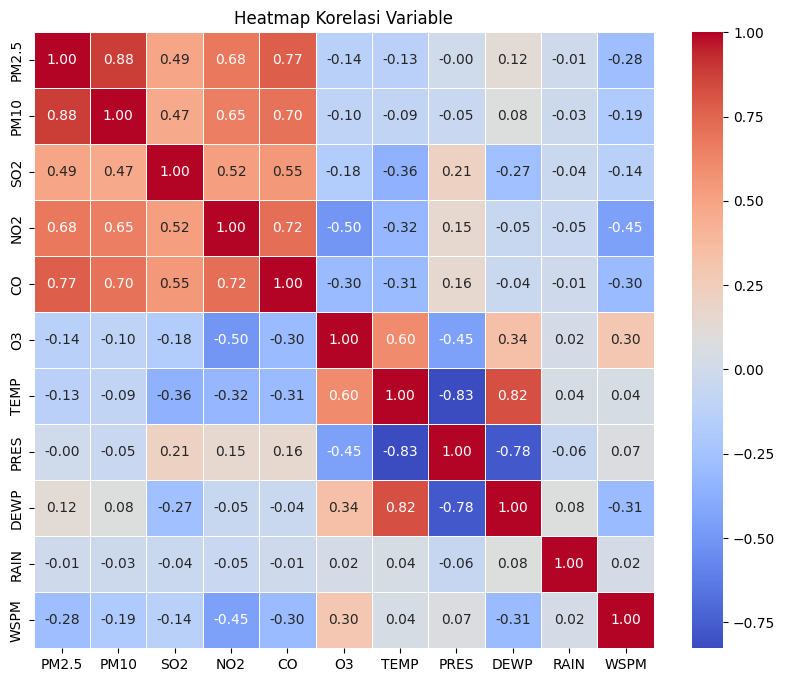

In [17]:
correlation_df = guanyuan_df[columns]
correlation_matrix = correlation_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot= True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Heatmap Korelasi Variable")
plt.show()

**Insight:**
- Terdapat korelasi sangat kuat antara PM2.5 dan PM10 dengan nilai korelasi 0.88, yang menunjukkan bahwa kedua polutan ini sering hadir bersamaan. Hal ini bisa disebabkan oleh sumber yang sama, seperti emisi dari kendaraan bermotor dan industri, serta fenomena yang serupa, seperti debu jalanan. Oleh karena itu, pengendalian polusi pada salah satu komponen ini kemungkinan besar juga akan berdampak pada pengurangan yang lain.
- Suhu (TEMP) memiliki korelasi positif yang signifikan dengan Ozon (O3), dengan nilai korelasi 0.60. Ini menunjukkan bahwa peningkatan suhu berpotensi meningkatkan konsentrasi O3. Fenomena ini mungkin disebabkan oleh reaksi fotokimia yang lebih aktif pada suhu yang lebih tinggi, terutama pada hari-hari cerah, di mana sinar matahari dan panas mempercepat pembentukan ozon di lapisan troposfer dari polutan seperti NO2.

### Pertanyaan 2: Bagaimana distribusi konsentrasi PM2.5 dan PM10 bulanan pada setiap tahun?

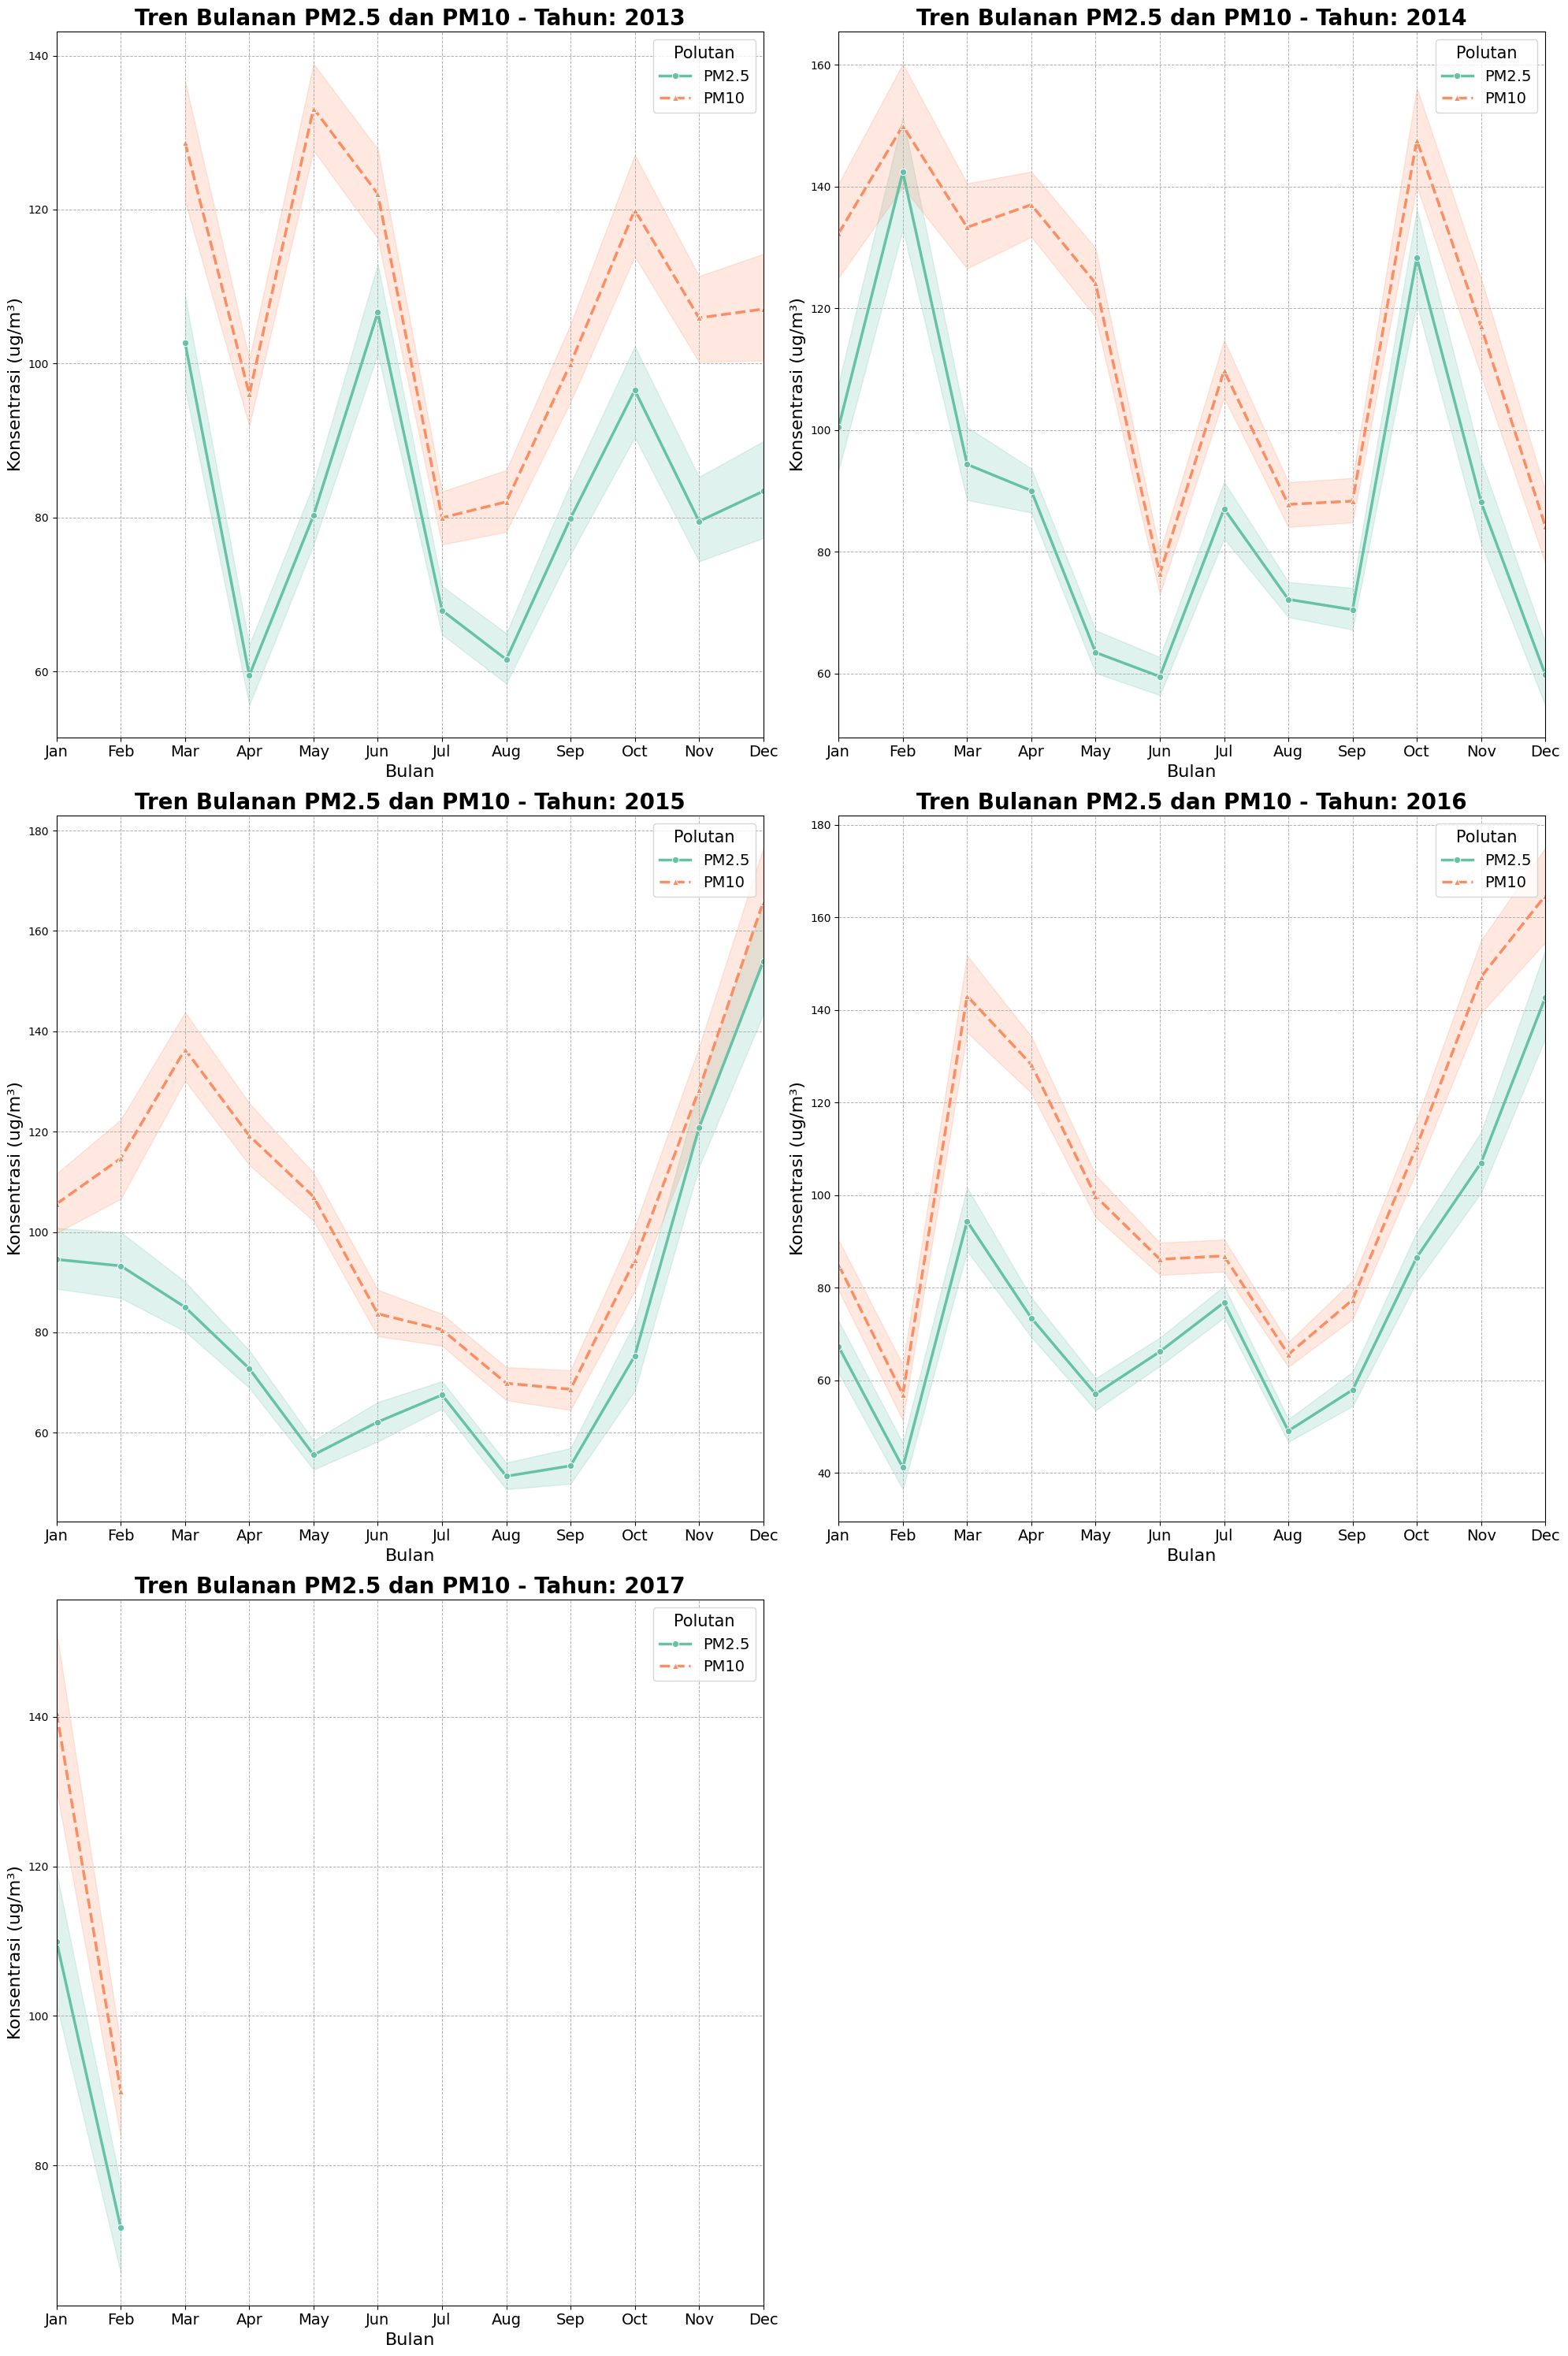

In [18]:
all_year_df = guanyuan_df[['PM2.5', 'PM10']].copy()
all_year_df['year'] = guanyuan_df.index.year
all_year_df['month'] = guanyuan_df.index.month
all_year_df.tail()

years = list(range(2013, 2018))
graph_colors = sns.color_palette('Set2', 2)

fig, axes = plt.subplots(3, 2, figsize=(20, 30))
fig.tight_layout(pad=6.0)

axes = axes.flatten()

for i, year in enumerate(years):
    yearly_data = all_year_df[all_year_df['year'] == year]
    
    sns.lineplot(data=yearly_data, x='month', y='PM2.5', color=graph_colors[0], marker='o', linestyle='-', linewidth=2.5, label='PM2.5', ax=axes[i])
    sns.lineplot(data=yearly_data, x='month', y='PM10', color=graph_colors[1], marker='^', linestyle='--', linewidth=2.5, label='PM10', ax=axes[i])

    axes[i].set_title(f'Tren Bulanan PM2.5 dan PM10 - Tahun: {year}', fontsize=20, fontweight='bold')
    axes[i].set_xlabel('Bulan', fontsize=16)
    axes[i].set_ylabel('Konsentrasi (ug/m³)', fontsize=16)
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
    axes[i].set_xlim(1, 12)
    axes[i].legend(title='Polutan', title_fontsize='15', loc='upper right', fontsize=14)
    axes[i].grid(True, linestyle='--', linewidth=0.7)

if len(years) < len(axes):
    for j in range(len(years), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Insight:**
- Polutan cenderung tinggi pada bulan Maret dan April
- Polutan cenderung rendah pda bulan Juli dan Agustus

### Pertanyaan 3: Apakah ada variasi musiman dalam kualitas udara? Musim apa yang cenderung memiliki tingkat polusi tertinggi dan terendah?

In [19]:
guanyuan_df['month'] = guanyuan_df.index.month
bymonth_df = guanyuan_df.groupby('month')
bymonth_df.tail()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,month
datetime,,,,,,,,,,,,,,
2016-03-31 19:00:00,191.0,301.0,15.0,75.0,1800.0,116.0,20.3,998.7,6.2,0.0,SSE,0.8,Guanyuan,3
2016-03-31 20:00:00,218.0,319.0,15.0,79.0,1900.0,100.0,19.3,999.0,6.7,0.0,S,1.0,Guanyuan,3
2016-03-31 21:00:00,182.0,390.0,14.0,83.0,1400.0,76.0,21.1,999.4,5.8,0.0,SSW,4.4,Guanyuan,3
2016-03-31 22:00:00,65.0,440.0,11.0,28.0,600.0,114.0,20.4,998.8,6.3,0.0,SSW,3.4,Guanyuan,3
2016-03-31 23:00:00,58.0,318.0,8.0,28.0,600.0,109.0,19.9,998.4,6.6,0.0,S,3.6,Guanyuan,3
2016-04-30 19:00:00,125.0,297.0,13.0,39.0,1200.0,201.0,25.1,996.3,15.4,0.0,SE,3.8,Guanyuan,4
2016-04-30 20:00:00,131.0,190.0,14.0,43.0,1300.0,153.0,24.0,997.3,15.2,0.0,SE,2.3,Guanyuan,4
2016-04-30 21:00:00,138.0,184.0,14.0,49.0,1300.0,121.0,22.5,997.3,15.1,0.0,ESE,3.3,Guanyuan,4
2016-04-30 22:00:00,149.0,181.0,14.0,45.0,1300.0,111.0,21.5,997.5,14.9,0.0,ESE,3.3,Guanyuan,4


C:\Users\msnfa\AppData\Local\Temp\ipykernel_16972\2782088507.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='PM2.5', data=guanyuan_df, palette="Set2", ax=ax[0])
C:\Users\msnfa\AppData\Local\Temp\ipykernel_16972\2782088507.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='PM10', data=guanyuan_df, palette="Set2", ax=ax[1])


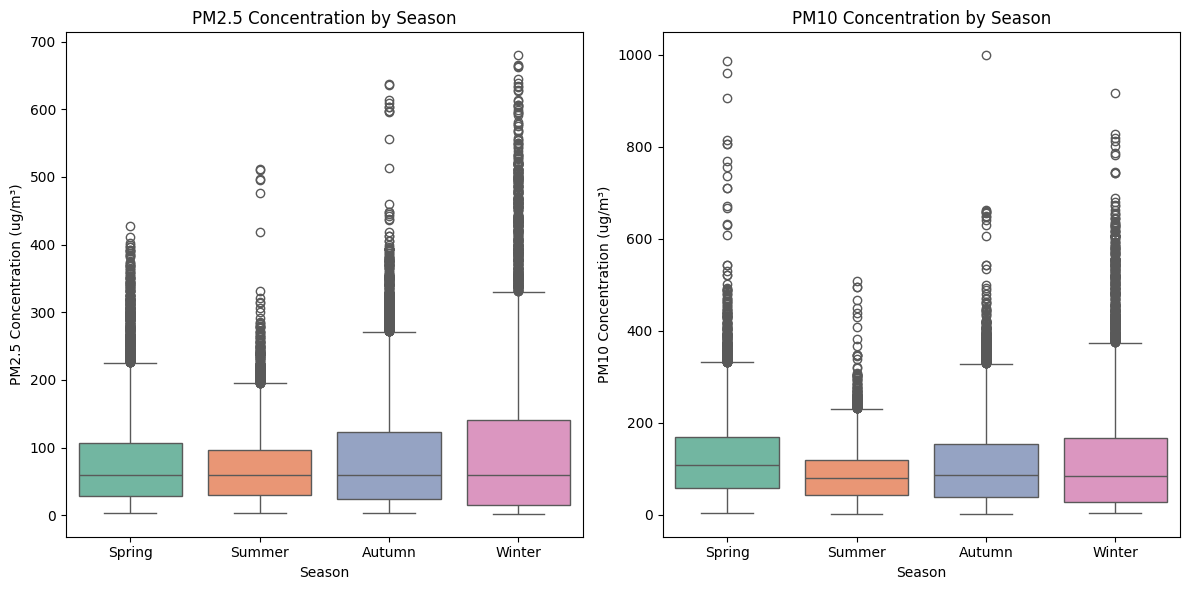

In [20]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    
all_year_df['Season'] = all_year_df["month"].apply(get_season)
byseason_df = all_year_df.groupby(by="Season").nunique()
byseason_df.drop(['year', 'month'], axis=1, inplace=True)
guanyuan_df['Season'] = guanyuan_df['month'].apply(get_season)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x='Season', y='PM2.5', data=guanyuan_df, palette="Set2", ax=ax[0])
ax[0].set_title("PM2.5 Concentration by Season")
ax[0].set_xlabel('Season')
ax[0].set_ylabel('PM2.5 Concentration (ug/m³)')

sns.boxplot(x='Season', y='PM10', data=guanyuan_df, palette="Set2", ax=ax[1])
ax[1].set_title("PM10 Concentration by Season")
ax[1].set_xlabel('Season')
ax[1].set_ylabel('PM10 Concentration (ug/m³)')

plt.tight_layout()
plt.show()


**Insight:**
- Pada musim dingin polutan cenderung tinggi
- Polutan pada musim panas cenderung lebih rendah

### Pertanyaan 4: Apakah ada variasi musiman dalam kualitas udara? Musim apa yang cenderung memiliki tingkat polusi tertinggi dan terendah?

<Figure size 640x480 with 0 Axes>

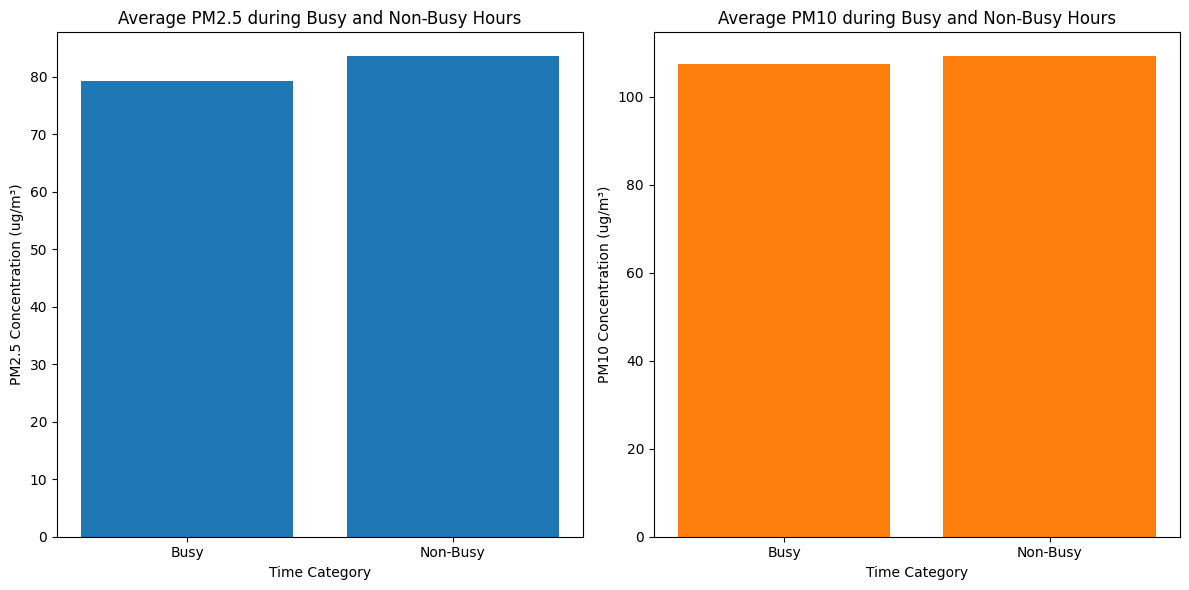

In [21]:
def categorize_time(hour):
    if 7 <= hour <= 9 or 17 <= hour <= 19:
        return 'Busy'
    else:
        return 'Non-Busy'

guanyuan_df['hour'] = guanyuan_df.index.hour
guanyuan_df['Time_Category'] = guanyuan_df['hour'].apply(categorize_time)

plt.suptitle("Pollution Levels during Busy and Non-Busy Hours")

busy_nonbusy_avg = guanyuan_df.groupby('Time_Category')[['PM2.5', 'PM10']].mean()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(busy_nonbusy_avg.index, busy_nonbusy_avg['PM2.5'], color='#1f77b4')
ax[0].set_title('Average PM2.5 during Busy and Non-Busy Hours')
ax[0].set_xlabel('Time Category')
ax[0].set_ylabel('PM2.5 Concentration (ug/m³)')

ax[1].bar(busy_nonbusy_avg.index, busy_nonbusy_avg['PM10'], color='#ff7f0e')
ax[1].set_title('Average PM10 during Busy and Non-Busy Hours')
ax[1].set_xlabel('Time Category')
ax[1].set_ylabel('PM10 Concentration (ug/m³)')

plt.tight_layout()
plt.show()


**Insight:**
- Konsentrasi PM2.5 dan PM10 terlihat hampir sama antara jam sibuk dan non-sibuk, dengan hanya sedikit perbedaan. Ini menunjukkan bahwa aktivitas lalu lintas atau sumber polusi yang meningkat selama jam sibuk mungkin tidak terlalu signifikan dalam memengaruhi tingkat polutan, atau terdapat faktor lain yang lebih dominan, seperti sumber polusi tetap (industri, pembakaran) yang terus beroperasi sepanjang waktu.
- Rata-rata konsentrasi PM10 lebih tinggi dari PM2.5 dalam kedua kategori waktu. Ini mungkin menunjukkan bahwa partikel-partikel yang lebih besar (PM10) lebih banyak di atmosfer dibandingkan partikel halus (PM2.5), yang mungkin berasal dari debu, tanah, atau aktivitas konstruksi. Ini memberikan informasi penting terkait prioritas pengendalian polusi, terutama dalam menangani sumber-sumber partikel kasar.

## Conclusion

- Conclution pertanyaan 1: Dari hasil analisis korelasi variabel, ditemukan bahwa konsentrasi PM2.5 dan PM10 memiliki hubungan yang sangat kuat, yang menunjukkan keduanya sering kali berasal dari sumber yang sama, seperti emisi kendaraan dan debu jalanan. Pengendalian pada salah satu polutan berpotensi memberikan dampak signifikan pada pengurangan polutan lainnya. Selain itu, suhu menunjukkan korelasi positif dengan konsentrasi ozon (O3), di mana kenaikan suhu cenderung meningkatkan kadar ozon. Hal ini bisa dijelaskan oleh reaksi kimia yang lebih aktif pada suhu tinggi, terutama pada kondisi sinar matahari yang kuat, yang mempercepat pembentukan ozon di udara.
- Conclution pertanyaan 2: Berdasarkan pola yang diamati, konsentrasi polutan cenderung lebih tinggi pada bulan Maret dan April, yang kemungkinan disebabkan oleh faktor cuaca, aktivitas manusia, atau kondisi lingkungan tertentu. Sebaliknya, konsentrasi polutan cenderung lebih rendah pada bulan Juli dan Agustus, yang mungkin dipengaruhi oleh kondisi cuaca yang lebih baik atau berkurangnya aktivitas polusi selama periode tersebut. Pola musiman ini dapat memberikan wawasan untuk merencanakan strategi pengendalian polusi udara yang lebih efektif pada waktu-waktu tertentu sepanjang tahun.
- Conclution pertanyaan 3: Dari pola musiman yang diamati, konsentrasi polutan cenderung lebih tinggi selama musim dingin, kemungkinan akibat peningkatan aktivitas pemanasan, stagnasi udara, atau kondisi cuaca yang memperangkap polutan di atmosfer. Sebaliknya, selama musim panas, konsentrasi polutan cenderung lebih rendah, mungkin karena adanya angin yang lebih kuat, suhu yang lebih tinggi, dan pencampuran udara yang lebih baik, yang membantu menyebarkan polutan. Pemahaman ini dapat membantu dalam merancang kebijakan pengendalian polusi yang lebih efektif berdasarkan musim.
- Conclution pertanyaan 4: Berdasarkan analisis, konsentrasi PM2.5 dan PM10 tidak menunjukkan perbedaan signifikan antara jam sibuk dan non-sibuk, yang mengindikasikan bahwa aktivitas lalu lintas tidak menjadi faktor utama dalam perubahan polusi udara. Sebaliknya, sumber-sumber polusi yang beroperasi secara konstan, seperti industri atau pembakaran, mungkin memiliki pengaruh yang lebih dominan terhadap kualitas udara. Selain itu, konsentrasi PM10 yang lebih tinggi dibandingkan PM2.5 dalam kedua kategori waktu menunjukkan perlunya fokus pada pengendalian partikel kasar (PM10), yang bisa berasal dari sumber-sumber seperti debu dan aktivitas konstruksi, dalam upaya meningkatkan kualitas udara secara keseluruhan.